# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [737]:
# Import libraries required for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import json

%matplotlib inline

In [494]:
# Create directory to store project data if it doesn't exist
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [495]:
# Read WeRateDogs Twitter archive into pandas dataframe
# NOTE: the WeRateDogs Twitter archieve has been pre-downloaded directly into the data directory

df1 = pd.read_csv(os.path.join(folder_name, 'twitter-archive-enhanced.csv'))

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [496]:
# Downloading image_predictions.tsv file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Write the content of the URL response to a file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

# Read file into pandas dataframe
df2 = pd.read_csv(os.path.join(folder_name, url.split('/')[-1]), sep='\t')

# Save file as csv for sake of visual assessment in an external application
df2.to_csv(os.path.join(folder_name, 'image-predictions.csv'), index=False)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

**NOTE:** I was not able to get twitter to approve my developer account due to some issues I have with my twitter account, I settled for using the provided tweet-json.txt file provided on Udacity.

In [497]:
# Write provided tweet-json.txt line by line into a list
# # NOTE: the tweet-json.txt file has been pre-downloaded directly into the data directory

with open(os.path.join(folder_name, 'tweet-json.txt')) as file:
    list = []
    for line in file:
         list.append(json.loads(line))

# Read list into pandas dataframe
df3 = pd.DataFrame.from_records(list)

# Create dataframe with only columns relevant to the project
df3 = df3[['id', 'retweet_count', 'favorite_count']]

# Save file as csv for sake of visual assessment in an external application
df3.to_csv(os.path.join(folder_name, 'tweet-json.csv'), index=False)

## Assessing Data

### Visual Assessment

Display each gathered data in a jupyter notebook for visual assessment. Further assessment is done using Microsoft Excel

In [498]:
# Visual assessment of the first dataframe taking random five samples
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
787,774639387460112384,NaN,NaN,2016-09-10 16:03:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprinkles. He's trapped in light jail....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/774639387...,10,10,Sprinkles,None,None,None,None
1685,681654059175129088,NaN,NaN,2015-12-29 01:52:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toffee. He's a happy pupper. Appears d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681654059...,12,10,Toffee,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
337,832397543355072512,NaN,NaN,2017-02-17 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eevee. She wants to see how you're doi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832397543...,12,10,Eevee,None,None,None,None
1790,677530072887205888,NaN,NaN,2015-12-17 16:45:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Axel. He's a Black Chevy Pinot on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677530072...,9,10,Axel,None,None,None,None


In [499]:
# Visual assessment of the second dataframe taking random five samples
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1928,858107933456039936,https://pbs.twimg.com/media/C-icm_WXUAAmuRR.jpg,1,golden_retriever,0.863874,True,Labrador_retriever,0.015920,True,doormat,0.010615,False
89,667534815156183040,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,1,Pembroke,0.435254,True,Cardigan,0.307407,True,cocker_spaniel,0.033158,True
1420,771770456517009408,https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg,1,papillon,0.533180,True,collie,0.192031,True,Border_collie,0.121626,True
1494,783334639985389568,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,2,Cardigan,0.593858,True,Shetland_sheepdog,0.130611,True,Pembroke,0.100842,True
1135,728751179681943552,https://pbs.twimg.com/media/Ch0LVPdW0AEdHgU.jpg,1,Saint_Bernard,0.482050,True,collie,0.202740,True,borzoi,0.037976,True


In [500]:
# Visual assessment of the third dataframe taking random five samples
df3.sample(5)

,id,retweet_count,favorite_count
918,756303284449767430,1231,4359
1308,707038192327901184,900,2404
792,773547596996571136,7126,24553
755,778650543019483137,1729,6430
2220,668466899341221888,560,936


### Programmatic Assessment

Using different pandas functions to assess each dataframe programmatically

In [501]:
# Programmatic assessment of the first dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [517]:
# Check the number of missing values in each column
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [519]:
# Check if we have duplicate entries in the first dataframe
df1.duplicated().sum()

0

In [503]:
# Check value count for each name entry in dataframe
df1.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Fiji         1
Tilly        1
Ralf         1
Norman       1
Glacier      1
Name: name, Length: 957, dtype: int64

In [609]:
# Check value count for each name entry that starts with a lower case
df1[df1.name.str[0].str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
mad              2
actually         2
getting          2
not              2
space            1
unacceptable     1
my               1
old              1
this             1
incredibly       1
by               1
such             1
all              1
light            1
infuriating      1
life             1
his              1
officially       1
Name: name, dtype: int64

In [611]:
# Check how many unique names that starts with lower case
df1[df1.name.str[0].str.islower()].name.nunique()

25

In [516]:
# Check the sum of all name entries that starts with lower case
df1[df1.name.str[0].str.islower()].name.value_counts().sum()

109

In [506]:
# Programmatic assessment of the second dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [520]:
# Check if we have duplicate entries in the second dataframe
df2.duplicated().sum()

0

In [666]:
# Get entries where the p1_dog, p2_dog and p3_dog values are False and investigate if they are dog related reviews
df2[(df2['p1_dog']==False) & (df2['p2_dog'] == False) & (df2['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [507]:
# Programmatic assessment of the third dataframe
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [521]:
# Check if we have duplicate entries in the third dataframe
df3.duplicated().sum()

0

### Quality issues

##### `df1` table
1. Missing expanded_urls entries

2. Some entries are retweets

3. Unnecessary columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

4. Erroneous datatype in tweet_id and timestamp columns

5. Incorrect dog names. These are observed for names that start with lowercase.


##### `df2` table
6. Erroneous datatype in tweet_id column

7. Entries with FALSE in p1_dog, p2_dog and p3_dog columns are not dog related reviews / ratings.

8. Inconsistency format in p1, p2 and p3 entries. Some start with uppercase, some start with lower case.


##### `df3` table
9. Erroneous datatype in id column


### Tidiness issues
1. `df1` - one variable in multiple columns (doggo, floofer, pupper and puppo)

2. `df3` - inconsistency in column name common in the three dataframes. `id` column should be `tweet_id`

3. All dataframe should be merged into one master dataframe

## Cleaning Data
Our goal is to have a clean master pandas Dataframe containing only **original ratings (no retweets) with images related to dogs**.

In [748]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Issue #1:
`df1`: Missing expanded_urls entries

#### Define:
Remove all reviews without expanded_urls entries

#### Code

In [749]:
# Drop all entries that are NaN in the expanded_urls column
df1_clean = df1_clean[df1_clean['expanded_urls'].notna()]

#### Test

In [750]:
# Check dataframe info to confirm expanded_urls entries are complete
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        2297 non-null   object 
 13  doggo                       2297 

### Issue #2:
`df1`: One variable in multiple columns (doggo, floofer, pupper and puppo)

#### Define:
Replace all None strings in each column with NaN, Combine doggo, floofer, pupper and puppo columns into one column called dog_stages, replace empty strings with NaN and drop the original columns

#### Code

In [751]:
# Loop through each dog stage column and replace all strings with value None to NaN
columns = ['doggo', 'floofer', 'pupper', 'puppo']
for column in columns:
    df1_clean[column].replace('None', np.nan, inplace=True)


# Join all entries in doggo, floofer, pupper, puppo into one column named dog_stages and drop the NaN values
df1_clean["dog_stages"] = df1_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ', '.join(x.dropna()), axis=1)


# For entries where no dog_stages information is not available, replace all empty strings with NaN
df1_clean['dog_stages'] = df1_clean[['dog_stages']].replace('', np.nan)


# Drop doggo, floofer, pupper and puppo columns as they are no longer needed
df1_clean = df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [752]:
# Check random five samples to ensure dog_stages column is created and contains expected information
# and the individual dog stage columns have been dropped
df1_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
430,821044531881721856,NaN,NaN,2017-01-16 17:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flash. He went way too hard celebratin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821044531...,12,10,Flash,NaN
1685,681654059175129088,NaN,NaN,2015-12-29 01:52:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toffee. He's a happy pupper. Appears d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681654059...,12,10,Toffee,pupper
1420,698262614669991936,NaN,NaN,2016-02-12 21:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He's a yoga master. Trying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698262614...,11,10,Franklin,NaN
1894,674743008475090944,NaN,NaN,2015-12-10 00:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just saw a spider. 10/10 d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674743008...,10,10,Sophie,NaN
1052,742528092657332225,NaN,NaN,2016-06-14 01:24:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxaroni. He's pumped as hell for the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742528092...,10,10,Maxaroni,NaN


### Issue #3:
`df3`: inconsistency in column name common in the three dataframes.

#### Define:
Rename id column to tweet_id

#### Code

In [753]:
# Rename the id column to tweet_id to make it consistent with the other dataframes
df3_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [754]:
# Check dataframe info to ensure column name is changed correctly
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Issue #4:
`df1`: Some entries are retweets

#### Define:
Remove all entries that are retweets

#### Code

In [755]:
# Drop all entries with notnull values in the retweeted_status_id column. These entries are considered to be retweets.
df1_clean = df1_clean[df1_clean.retweeted_status_id.isnull()]

#### Test

In [756]:
# Check dataframe information to confirm all remaining entries have no value in their retweeted_status_id column
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  dog_stages                  338 n

### Issue #5:
`df1`: Irrelevant columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Define:
Drop all irrelevant columns

#### Code

In [757]:
# List of irrelevant columns
irrelevant_columns = ['in_reply_to_status_id',
                      'in_reply_to_user_id',
                      'retweeted_status_id',
                      'retweeted_status_user_id',
                      'retweeted_status_timestamp']

# Drop all irrelevant columns
df1_clean = df1_clean.drop(irrelevant_columns, axis = 1)

#### Test

In [758]:
# Check dataframe information to confirm unimportant columns have been dropeed successfully
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   int64 
 1   timestamp           2117 non-null   object
 2   source              2117 non-null   object
 3   text                2117 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2117 non-null   int64 
 6   rating_denominator  2117 non-null   int64 
 7   name                2117 non-null   object
 8   dog_stages          338 non-null    object
dtypes: int64(3), object(6)
memory usage: 165.4+ KB


### Issue #6:
`df1`: Erroneous datatype in tweet_id and timestamp columns

#### Define:
Change datatype of tweet_id from int64 to str and timestamp from object to datetime64 using the astype method

#### Code

In [759]:
# Change the datatype of columns using astype method
df1_clean.tweet_id = df1_clean.tweet_id.astype('str')
df1_clean.timestamp = df1_clean.timestamp.astype('datetime64')

#### Test

In [760]:
# Check the dataframe information to confirm the desired datatype for the timestamp column has been achieved
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2117 non-null   object        
 1   timestamp           2117 non-null   datetime64[ns]
 2   source              2117 non-null   object        
 3   text                2117 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2117 non-null   int64         
 6   rating_denominator  2117 non-null   int64         
 7   name                2117 non-null   object        
 8   dog_stages          338 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 165.4+ KB


### Issue #7:
`df1`: Incorrect dog names. These are observed for names that start with lowercase

#### Define:
Change all entries in name column starting with lowercase to 'None'

#### Code

In [761]:
# List of all names starting with lowercase
incorrect_names = []

for name in df1_clean.name:
    if name.islower() and name not in incorrect_names:
        incorrect_names.append(name)
print(incorrect_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [762]:
# Replace all entries that start with lower case in the name column with the word "None'
df1_clean.name.replace(incorrect_names, 'None', inplace=True)

#### Test

In [763]:
# TEST 1: Check dataframe to ensure no name starts with a lowercase

df1_clean[df1_clean.name.str[0].str.islower()].name.sum()

0

In [764]:
# TEST 2: Check the number of uniques names in the dataframe

df1_clean.name.value_counts()

None       726
Lucy        11
Charlie     11
Cooper      10
Oliver      10
          ... 
O            1
Perry        1
Spencer      1
Fwed         1
Gert         1
Name: name, Length: 931, dtype: int64

### Issue #8:
`df2`: Erroneous datatype in tweet_id column

#### Define:
Change datatype of tweet_id from str to object using the astype method

#### Code

In [765]:
# Change the datatype of tweet_id column using astype method
df2_clean.tweet_id = df2_clean.tweet_id.astype('str')

#### Test

In [766]:
# Check the dataframe information to confirm datatype for the tweet_id column changed successfully
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #9:
`df2`: Entries with FALSE in p1_dog, p2_dog and p3_dog columns are not dog related reviews / ratings.

#### Define:
Identify all entries with p1_dog, p2_dog and p3_dog equal to False and drop them from the dataframe

#### Code

In [767]:
# drop subset dataframe not related to dog
df2_clean = df2_clean.drop(df2_clean[(df2_clean['p1_dog']==False) & (df2_clean['p2_dog'] == False) & (df2_clean['p3_dog'] == False)].index)

#### Test

In [768]:
# Check if dataframe not related to dog has any entries
df2_clean[(df2_clean['p1_dog']==False) & (df2_clean['p2_dog'] == False) & (df2_clean['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #10:
`df2`: Inconsistency format in p1, p2 and p3 entries. Some start with uppercase, some start with lower case.

#### Define:
Change the p1, p2 and p3 values to lowercase

#### Code

In [769]:
# Change the p1, p2, and p3 values to lower case.
columns = ['p1', 'p2', 'p3']
for column in columns:
    df2_clean[column] = df2_clean[column].str.lower()

#### Test

In [770]:
# Visually assess dataframe to confirm all entries in the p1, p2 and p3 columns are in lower case
df2_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1679,813217897535406080,https://pbs.twimg.com/media/C0khWkVXEAI389B.jpg,1,samoyed,0.905972,True,pomeranian,0.048038,True,west_highland_white_terrier,0.035667,True
630,680934982542561280,https://pbs.twimg.com/media/CXMqwIQWcAA2iE0.jpg,1,labrador_retriever,0.784398,True,siberian_husky,0.055925,True,beagle,0.022750,True
947,704761120771465216,https://pbs.twimg.com/media/CcfQgHVWoAAxauy.jpg,1,siamese_cat,0.202294,False,chihuahua,0.100418,True,basenji,0.072097,True
1768,827199976799354881,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,great_dane,0.869681,True,american_staffordshire_terrier,0.026658,True,boxer,0.019866,True
1907,852553447878664193,https://pbs.twimg.com/media/C9Tg1bPW0AkAMDI.jpg,1,bloodhound,0.186498,True,brabancon_griffon,0.139028,True,rottweiler,0.125940,True


### Issue #11:
`df3`: Erroneous datatype in tweet_id column

#### Define:
Change datatype of tweet_id from int64 to str using the astype method

#### Code

In [771]:
# Change the datatype of tweet_id column using astype method
df3_clean.tweet_id = df3_clean.tweet_id.astype('str')

#### Test

In [772]:
# Check the dataframe information to confirm datatype for the tweet_id column changed successfully
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #12:
All dataframe should be merged into one master dataframe

#### Define:
Crate a master dataframe by Merging all dataframes innerly using their common tweet_id column. This will ensure only entries with tweet_id common in the three dataframe is present in the master dataframe.

#### Code

In [779]:
# Import the reduce method from the functools module
from functools import reduce

# Merge all three dataframe innerly into a single master dataframe.
df_master = reduce(lambda x,y: pd.merge(x,y, on='tweet_id', how='inner'), [df1_clean, df2_clean, df3_clean])

In [780]:
# Check the master dataframe information to confirm the three dataframes are merged successfully and has complete entries
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1686 non-null   object        
 1   timestamp           1686 non-null   datetime64[ns]
 2   source              1686 non-null   object        
 3   text                1686 non-null   object        
 4   expanded_urls       1686 non-null   object        
 5   rating_numerator    1686 non-null   int64         
 6   rating_denominator  1686 non-null   int64         
 7   name                1686 non-null   object        
 8   dog_stages          260 non-null    object        
 9   jpg_url             1686 non-null   object        
 10  img_num             1686 non-null   int64         
 11  p1                  1686 non-null   object        
 12  p1_conf             1686 non-null   float64       
 13  p1_dog              1686 non-null   bool        

In [781]:
df_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1175,682389078323662849,2015-12-31 02:33:29,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brody. He's a Downton Abbey Falsetto. Add...,https://twitter.com/dog_rates/status/682389078...,9,10,Brody,NaN,https://pbs.twimg.com/media/CXhVKtvW8AAyiyK.jpg,...,0.482288,True,flat-coated_retriever,0.315286,True,great_dane,0.062179,True,518,1828
113,862096992088072192,2017-05-10 00:08:34,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,https://twitter.com/dog_rates/status/862096992...,13,10,None,NaN,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,...,0.677589,True,pomeranian,0.270648,True,pekinese,0.038110,True,21840,66437
442,789268448748703744,2016-10-21 00:53:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Stella. She's happier than I will ever...,https://twitter.com/dog_rates/status/789268448...,10,10,Stella,NaN,https://pbs.twimg.com/media/CvQLdotWcAAZn86.jpg,...,0.812860,True,siberian_husky,0.120853,True,eskimo_dog,0.024269,True,3014,10196
671,747512671126323200,2016-06-27 19:31:23,"<a href=""http://twitter.com/download/iphone"" r...",Guys pls stop sending actual sharks. It's too ...,https://twitter.com/dog_rates/status/747512671...,10,10,None,NaN,https://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg,...,0.111493,True,malinois,0.095089,True,german_shepherd,0.080146,True,1803,6110
1472,671115716440031232,2015-11-29 23:57:10,"<a href=""http://twitter.com/download/iphone"" r...","Meet Phred. He isn't steering, looking at the ...",https://twitter.com/dog_rates/status/671115716...,6,10,Phred,NaN,https://pbs.twimg.com/media/CVBILUgVAAA1ZUr.jpg,...,0.406341,True,kelpie,0.143366,True,dingo,0.129802,False,842,1436


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [782]:
# Store cleaned master dataframe in a csv file
df_master.to_csv(os.path.join(folder_name, 'twitter_archive_master.csv'), index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [783]:
df_master = pd.read_csv(os.path.join(folder_name, 'twitter_archive_master.csv'))

In [784]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.686000e+03,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1.686000e+03,1686.000000,1686.000000
mean,7.392710e+17,11.473903,10.534401,1.215896,0.605150,0.137147,6.135847e-02,2817.118031,9233.109727
std,6.800607e+16,8.106793,6.945891,0.576191,0.266416,0.101252,5.188051e-02,4807.199770,12583.246963
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,0.000010,2.160900e-07,16.000000,81.000000
25%,6.773835e+17,10.000000,10.000000,1.000000,0.378746,0.054938,1.598680e-02,649.250000,2163.250000
50%,7.132943e+17,11.000000,10.000000,1.000000,0.606701,0.121432,4.995100e-02,1437.500000,4440.000000
75%,7.931770e+17,12.000000,10.000000,1.000000,0.851578,0.198429,9.468462e-02,3247.750000,11656.750000
max,8.921774e+17,165.000000,150.000000,4.000000,0.999984,0.467678,2.734190e-01,79515.000000,132810.000000


In [733]:
df_master.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1655
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       22
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

In [736]:
df_master.source.value_counts()[0] / len(df_master.index) * 100

98.16132858837486

In [721]:
df_master.rating_numerator.mode()

0    12
dtype: int64

In [722]:
df_master.rating_denominator.mode()

0    10
dtype: int64

In [728]:
df_master.p1.value_counts()

golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    54
                     ... 
carton                  1
timber_wolf             1
ski_mask                1
mortarboard             1
shower_curtain          1
Name: p1, Length: 214, dtype: int64

In [729]:
df_master.p2.value_counts()

labrador_retriever          96
golden_retriever            82
cardigan                    72
chihuahua                   43
chesapeake_bay_retriever    40
                            ..
hair_slide                   1
wig                          1
computer_keyboard            1
timber_wolf                  1
basketball                   1
Name: p2, Length: 229, dtype: int64

In [732]:
df_master.p3.value_counts()

labrador_retriever    76
chihuahua             57
golden_retriever      46
eskimo_dog            36
kelpie                33
                      ..
grocery_store          1
television             1
steam_locomotive       1
water_buffalo          1
coyote                 1
Name: p3, Length: 234, dtype: int64

### Insights:
1. 98% of the tweets were made using an iPhone 

2. Most frequent rating numerator is 12 and most frequent rating demonimator is 10.

3. Most popular dog breeds are golden retriever followed by the labrador retriever before the chihuahua.

### Visualization

**Question**: Is there a relationship between retween count and favourite count?

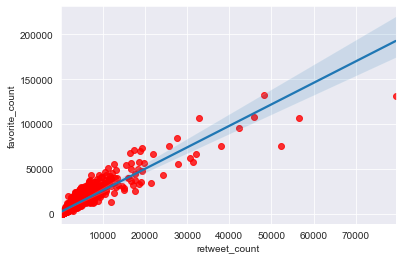

In [743]:
sns.set_style('darkgrid')
sns.regplot(df_master.retweet_count,
            df_master.favorite_count,
            scatter_kws = {'color': 'Red'});

The plot above attempts to visualize the relationship between retweet_count and favorite_count.
We can see there is a positive linear relationship between the two series which implies the tendency of increment in either retweet_count as favorite_count increases and vice versa. This would not always be, but most likely be the case.